------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Functional Analysis (Differentially Expressed Genes between DMSO and DAPT Treatment Group)

--------------------------------------------------------------------------------

## **Database:** WP (Wikipathway) and KEGG (Kyoto Encyclopedia of Genes and Genome)

## **R Package:** g:Profiler2

## **Author:** Hammed Gafar

--------------------------------------------------------------------------------

In [2]:
install.packages("BiocManager")
install.packages("gprofiler2")
BiocManager::install("clusterProfiler")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘lazyeval’, ‘RCurl’, ‘plotly’, ‘crosstalk’, ‘gridExtra’


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)

Installing package(s) 'BiocVersion', 'clusterProfiler'

also installing the dependencies ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘formatR’, ‘XVector’, ‘GenomeInfoDb’, ‘lambda.r’, ‘futile.options’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘plogr’, ‘png’, ‘Biostrings’, ‘futile.logger’, ‘snow’, ‘BH’, ‘cowplot’, ‘fastmatch’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ape’, ‘tidytree’, ‘treeio’, ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘Biobase’, ‘IRanges’, ‘RSQLite’, ‘S4V

In [96]:

library(dplyr)
library(gprofiler2)
library(clusterProfiler)
library(enrichplot)
library(DOSE) # needed to convert to enrichResult objectresults_df=read.csv(Differential_expression_analysis_table_corrected--.csv")
#library("readxl")
library(ggplot2)

In [97]:
# Print package versions to screen
print(paste("dplyr version:", packageVersion("dplyr")))
print(paste("gprofiler2 version:", packageVersion("gprofiler2")))
print(paste("clusterProfiler version:", packageVersion("clusterProfiler")))
print(paste("enrichplot version:", packageVersion("enrichplot")))
print(paste("DOSE version:", packageVersion("DOSE")))
print(paste("stringr version:", packageVersion("stringr")))

[1] "dplyr version: 1.1.4"
[1] "gprofiler2 version: 0.2.3"
[1] "clusterProfiler version: 4.16.0"
[1] "enrichplot version: 1.28.2"
[1] "DOSE version: 4.2.0"
[1] "stringr version: 1.5.1"


In [98]:
library(stringr)

In [99]:
# Check the current working directory
#getwd()

In [100]:
#Database Versions
get_version_info(organism = "mmusculus")


$biomart
[1] "Ensembl"

$biomart_version
[1] "112"

$display_name
[1] "Mouse"

$genebuild
[1] "GRCm39"

$gprofiler_version
[1] "e112_eg59_p19_25aa4782"

$organism
[1] "mmusculus"

$sources
$sources$CORUM
$sources$CORUM$name
[1] "CORUM protein complexes"

$sources$CORUM$version
[1] "28.11.2022 Corum 4.1"


$sources$`GO:BP`
$sources$`GO:BP`$name
[1] "biological process"

$sources$`GO:BP`$version
[1] "annotations: BioMart\nclasses: releases/2024-10-27"


$sources$`GO:CC`
$sources$`GO:CC`$name
[1] "cellular component"

$sources$`GO:CC`$version
[1] "annotations: BioMart\nclasses: releases/2024-10-27"


$sources$`GO:MF`
$sources$`GO:MF`$name
[1] "molecular function"

$sources$`GO:MF`$version
[1] "annotations: BioMart\nclasses: releases/2024-10-27"


$sources$HP
$sources$HP$name
[1] "Human Phenotype Ontology"

$sources$HP$version
[1] "annotations: 02.2025\nclasses: None"


$sources$KEGG
$sources$KEGG$name
[1] "Kyoto Encyclopedia of Genes and Genomes"

$sources$KEGG$version
[1] "KEGG FTP Release 2024-01-22"


$sources$MIRNA
$sources$MIRNA$name
[1] "miRTarBase"

$sources$MIRNA$version
[1] "Release 9.0"


$sources$REAC
$sources$REAC$name
[1] "Reactome"

$sources$REAC$version
[1] "annotations: BioMart\nclasses: 2025-2-3"


$sources$TF
$sources$TF$name
[1] "Transfac"

$sources$TF$version
[1] "annotations: TRANSFAC Release 2023.2\nclasses: v2"


$sources$WP
$sources$WP$name
[1] "WikiPathways"

$sources$WP$version
[1] "20250110"



$taxonomy_id
[1] "10090"

# Data Preprocessing

In [101]:
results_df=read.csv("Differential_expression_analysis_table_corrected--.csv")


#remove duplicate
results_df=results_df[-2,]

#results_df=results_df[-13264,]
rownames(results_df)=results_df[,1]

# keep only the significant genes
results_sig = subset(results_df, padj < 0.05)

#Print
string1 <- "Significant Genes    "
concatenated_string_str_c <- str_c(string1, nrow(results_sig))
print(concatenated_string_str_c)

# get the significant up-regulated genes
results_upRegulated = subset(results_sig, log2FoldChange > 0)

#Print
string1 <- "up-regulated genes    "
concatenated_string_str_c <- str_c(string1, nrow(results_upRegulated))
print(concatenated_string_str_c)

# get the significant down-regulated genes
results_downRegulated = subset(results_sig, log2FoldChange < 0)

#Print
string1 <- "down-regulated genes    "
concatenated_string_str_c <- str_c(string1, nrow(results_downRegulated))
print(concatenated_string_str_c)

sig_results_ordered = results_sig[order(results_sig$log2FoldChange, decreasing = TRUE),]

# order genes by log2FC
upRegulated_ordered = results_upRegulated[order(results_upRegulated$log2FoldChange, decreasing = TRUE),]
downRegulated_ordered = results_downRegulated[order(results_downRegulated$log2FoldChange, decreasing = TRUE),]

#Convert gene name to Ensembl ID using g:Convert from g:Profiler2
sig_results_ordered_gconvert = gconvert(row.names(sig_results_ordered),organism="mmusculus")
upRegulated_ordered_gconvert = gconvert(row.names(upRegulated_ordered),organism="mmusculus")
downRegulated_ordered_gconvert = gconvert(row.names(downRegulated_ordered),organism="mmusculus")
#View(sig_results_ordered_gconvert)

sig_results_ordered = sig_results_ordered_gconvert$target
upRegulated_ordered = upRegulated_ordered_gconvert$target
downRegulated_ordered = downRegulated_ordered_gconvert$target

[1] "Significant Genes    6216"
[1] "up-regulated genes    2963"
[1] "down-regulated genes    3253"



--------------------------------------------------------------------------------
# Over Presentation Analysis
## KEGG (Both Upregulated and downregulated, Upregulated, and Downregulated Genes)

--------------------------------------------------------------------------------

* ##  Both Upregulated and downregulated



In [102]:
#Significant Gene
gp_sig_genes = gost(
  query= list("UPREGULATED AND DOWNREGULATED GENE" = sig_results_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = FALSE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = TRUE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "KEGG",
  as_short_link = FALSE,
  highlight = FALSE
)

In [103]:
# Remove the 'parents' list column
gp_sig_genes$result$parents <- NULL

# write the data to a CSV file
write.csv(gp_sig_genes$result, file = "gp_sig_genes_results_KEGG.csv", row.names = TRUE)

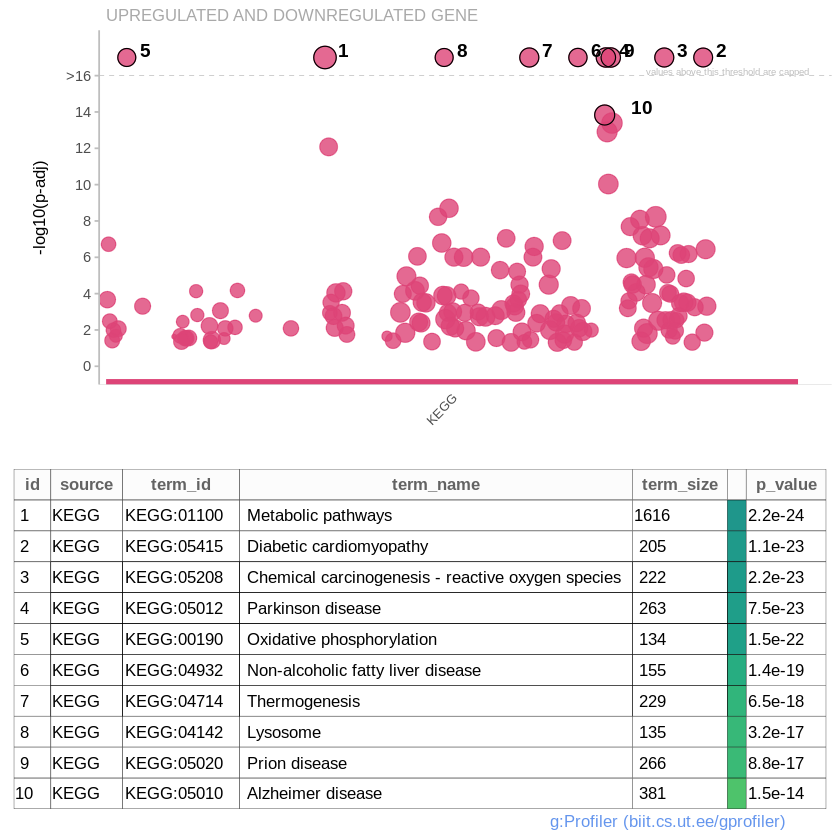

In [104]:

highlightedTerms = gp_sig_genes$result$term_id[1:10]

P <- publish_gostplot(gostplot(gp_sig_genes, interactive = FALSE), highlight_terms = highlightedTerms,
                 width = NA, height = NA)


**Save Link**

In [105]:
gp_sig_genes_link = gost(
  query= list("UPREGULATED AND DOWNREGULATED GENE" = sig_results_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = FALSE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = TRUE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "KEGG",
  as_short_link = TRUE,
  highlight = FALSE
)

# Print the link
print("URL")
print(gp_sig_genes_link)

#save link
writeLines(gp_sig_genes_link, "gprofiler_KEGG_AllSig_result_link.txt")


[1] "URL"
[1] "https://biit.cs.ut.ee/gplink/l/aLUDWaOr-Rb"


## Convert to enrichResult and compareClusterResult object for Visualization

In [106]:

# Modify the g:Profiler result data frame
gp_mod = gp_sig_genes$result[, c("query", "source", "term_id", "term_name", "p_value", "query_size",
                                 "intersection_size", "term_size", "effective_domain_size", "intersection")]
gp_mod$GeneRatio = paste0(gp_mod$intersection_size, "/", gp_mod$query_size)
gp_mod$BgRatio = paste0(gp_mod$term_size, "/", gp_mod$effective_domain_size)
names(gp_mod) = c("Cluster", "Category", "ID", "Description", "p.adjust", "query_size", "Count",
                  "term_size", "effective_domain_size", "geneID", "GeneRatio", "BgRatio")
gp_mod$geneID = gsub(",", "/", gp_mod$geneID)

# Convert Cluster to a factor
gp_mod$Cluster <- as.factor(gp_mod$Cluster)

row.names(gp_mod) = gp_mod$ID

# gp_mod$Cluster <- as.numeric(gp_mod$Cluster)
#gp_mod$Cluster <- order(as.numeric(unique(result$Cluster)))

# Define as compareClusterResult object
gp_mod_cluster = new("compareClusterResult", compareClusterResult = gp_mod)

# Define as enrichResult object
gp_mod_enrich = new("enrichResult", result = gp_mod)

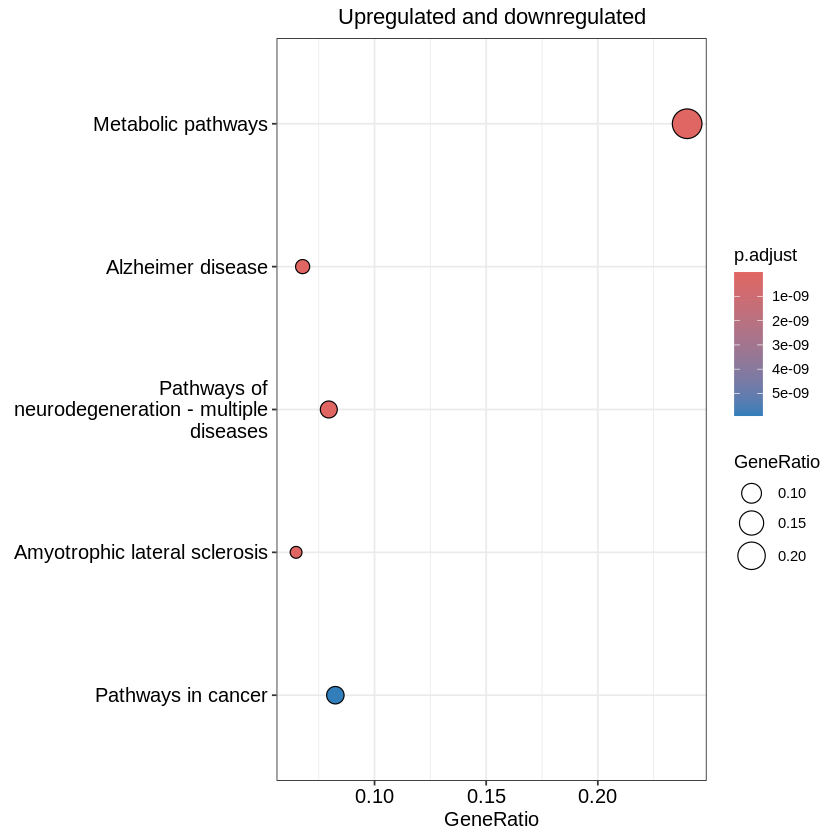

In [107]:
# Plot dotplot using enrichplot
p=enrichplot::dotplot(gp_mod_cluster,x="GeneRatio",title="Upregulated and downregulated")
p+theme(plot.title = element_text(hjust = 0.5))

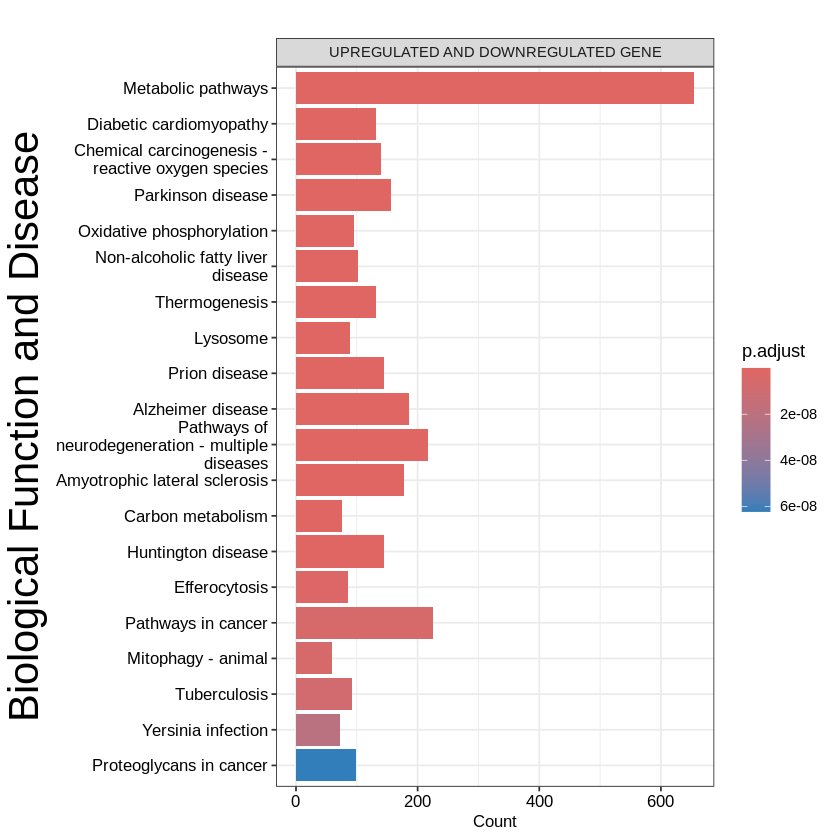

In [108]:
# Plot barplot
barplot(gp_mod_enrich, showCategory = 20, font.size = 10) +
  ggplot2::facet_grid(~Cluster) +
  ggplot2::ylab("Biological Function and Disease")+
 ggplot2::theme(axis.title.y = element_text(size = 25))


* ## Upregulated



In [109]:
#Upregulated Gene
gp_up_genes = gost(
  query= list("up-regulated" = upRegulated_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = FALSE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = TRUE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "KEGG",
  as_short_link = FALSE,
  highlight = FALSE
)

In [110]:
# Remove the 'parents' list column
gp_up_genes$result$parents <- NULL

# write the data to a CSV file
write.csv(gp_up_genes$result, file = "gp_sig_genes_results_KEGG_up.csv", row.names = TRUE)

In [111]:
# Trim whitespace from the query column
gp_up_genes$result$query <- trimws(gp_up_genes$result$query)

# Check unique values to verify correctness
unique(gp_up_genes$result$query)

# Now extract top 10 term_ids for each group
top_up <- head(subset(gp_up_genes$result, query == "up-regulated")$term_id, 10)
#top_down <- head(subset(gp_up_and_down_genes$result, query == "down-regulated")$term_id, 5)
top_down=NULL
# Combine them
combined_ids <- c(top_up, top_down)

# Print result
print(combined_ids)

[1] "up-regulated"

 [1] "KEGG:05152" "KEGG:04148" "KEGG:05164" "KEGG:05167" "KEGG:04625"
 [6] "KEGG:05168" "KEGG:05161" "KEGG:04620" "KEGG:05417" "KEGG:05145"


The image is saved to gp_sig_genes_KEGG_up.jpeg



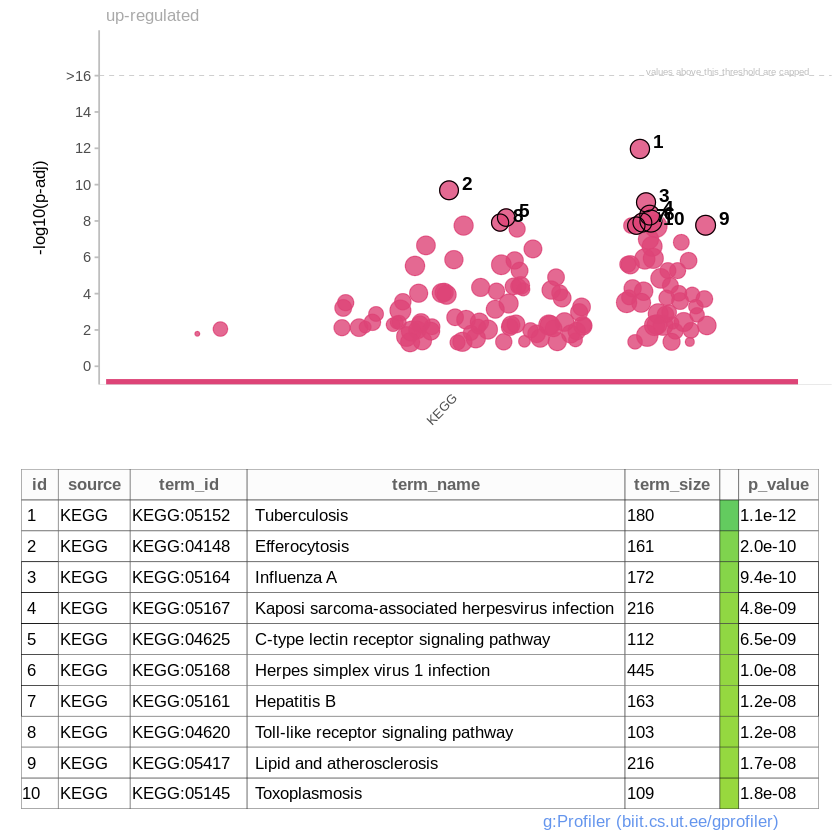

In [112]:
p = gostplot(gp_up_genes, interactive = FALSE)


p <- publish_gostplot(p, highlight_terms = combined_ids,
                 width = NA, height = NA,
                 filename = "gp_sig_genes_KEGG_up.jpeg" )

In [113]:
gp_up_genes_link = gost(
  query= list("up-regulated" = upRegulated_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = TRUE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = FALSE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "KEGG",
  as_short_link = TRUE,
  highlight = FALSE
)

# Print the link
print("URL")
print(gp_up_genes_link)

[1] "URL"
[1] "https://biit.cs.ut.ee/gplink/l/auZBRRs47Sb"


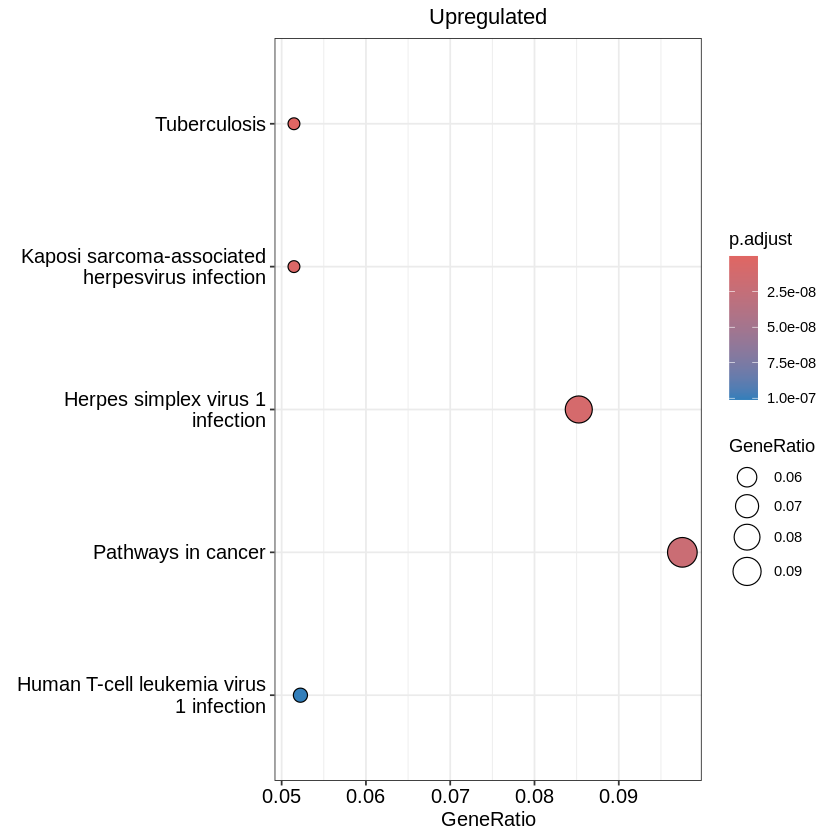

In [114]:
# Modify the g:Profiler result data frame
gp_mod = gp_up_genes$result[, c("query", "source", "term_id", "term_name", "p_value", "query_size",
                                         "intersection_size", "term_size", "effective_domain_size", "intersection")]
gp_mod$GeneRatio = paste0(gp_mod$intersection_size, "/", gp_mod$query_size)
gp_mod$BgRatio = paste0(gp_mod$term_size, "/", gp_mod$effective_domain_size)
names(gp_mod) = c("Cluster", "Category", "ID", "Description", "p.adjust", "query_size", "Count",
                  "term_size", "effective_domain_size", "geneID", "GeneRatio", "BgRatio")
gp_mod$geneID = gsub(",", "/", gp_mod$geneID)

row.names(gp_mod) = gp_mod$ID

 gp_mod$Cluster <- as.factor(gp_mod$Cluster)

# Define as compareClusterResult object
gp_mod_cluster = new("compareClusterResult", compareClusterResult = gp_mod)

# Define as enrichResult object
gp_mod_enrich = new("enrichResult", result = gp_mod)

# Plot dotplot using enrichplot
enrichplot::dotplot(gp_mod_cluster,x="GeneRatio",title="Upregulated")+theme(plot.title = element_text(hjust = 0.5))





In [115]:
# Get results table
results_table = as.data.frame(gp_mod_cluster)

# Extract specific columns
pathways = gp_mod_cluster@compareClusterResult$Description
gene_ratios = gp_mod_cluster@compareClusterResult$GeneRatio
p_values = gp_mod_cluster@compareClusterResult$p.adjust

In [116]:
# Get significant pathways
sig_pathways = subset(gp_mod_cluster@compareClusterResult, p.adjust < 0.05)

# Compare gene ratios between clusters
cluster_comparison = split(gp_mod_cluster@compareClusterResult$GeneRatio,
                         gp_mod_cluster@compareClusterResult$Cluster)

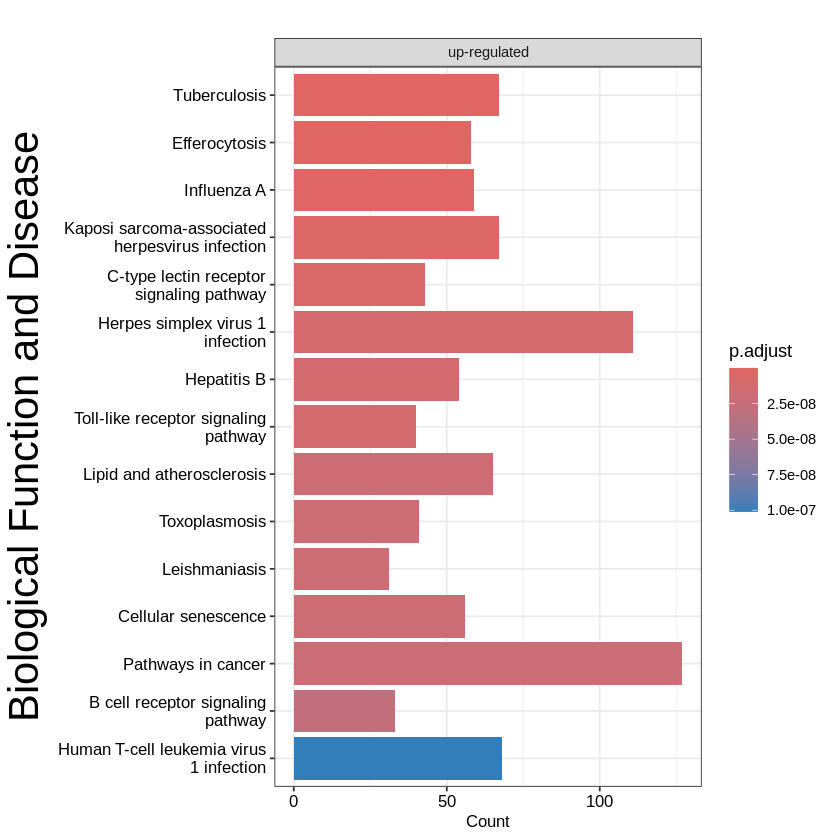

In [117]:
# Plot barplot
barplot(gp_mod_enrich, showCategory = 15, font.size = 10) +
  ggplot2::facet_grid(~Cluster) +
  ggplot2::ylab("Biological Function and Disease") +
   ggplot2::theme(axis.title.y = element_text(size = 25))


* ## Downregulated



In [118]:
#Downregulated Gene
gp_down_genes = gost(
  query= list("down-regulated" = downRegulated_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = FALSE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = TRUE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "KEGG",
  as_short_link = FALSE,
  highlight = FALSE
)

In [119]:

# Remove the 'parents' list column
gp_down_genes$result$parents <- NULL

# write the data to a CSV file
write.csv(gp_down_genes$result, file = "gp_sig_genes_results_KEGG_down.csv", row.names = TRUE)

# Trim whitespace from the query column
gp_down_genes$result$query <- trimws(gp_down_genes$result$query)

# Check unique values to verify correctness
unique(gp_down_genes$result$query)

# Now extract top 10 term_ids for each group
top_down <- head(subset(gp_down_genes$result, query == "down-regulated")$term_id, 10)
top_up=NULL
# Combine them
combined_ids <- c(top_up, top_down)

# Print result
print(combined_ids)

[1] "down-regulated"

 [1] "KEGG:01100" "KEGG:00190" "KEGG:05012" "KEGG:05415" "KEGG:04714"
 [6] "KEGG:05208" "KEGG:05020" "KEGG:04932" "KEGG:05016" "KEGG:05010"


The image is saved to gp_sig_genes_KEGG_down.jpeg



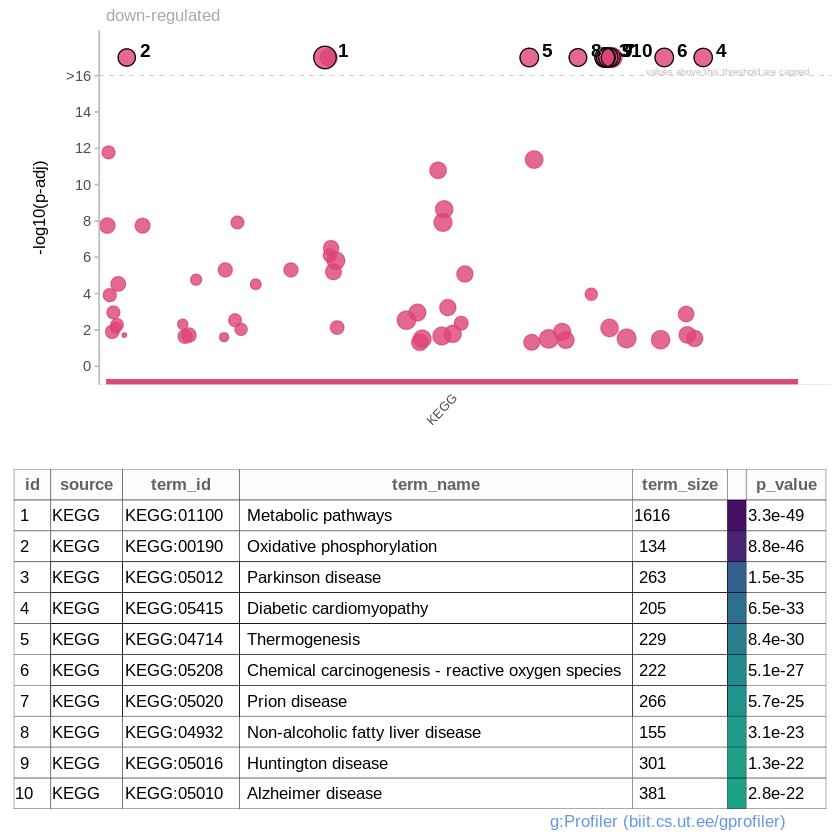

In [120]:
p = gostplot(gp_down_genes, interactive = FALSE)


p <- publish_gostplot(p, highlight_terms = combined_ids,
                 width = NA, height = NA,
                 filename = "gp_sig_genes_KEGG_down.jpeg" )

In [121]:
gp_down_genes_link = gost(
  query= list("down-regulated" = downRegulated_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = TRUE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = FALSE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "KEGG",
  as_short_link = TRUE,
  highlight = FALSE
)

# Print the link
print("URL")
print(gp_down_genes_link)

[1] "URL"
[1] "https://biit.cs.ut.ee/gplink/l/aFkqLu6b2QD"


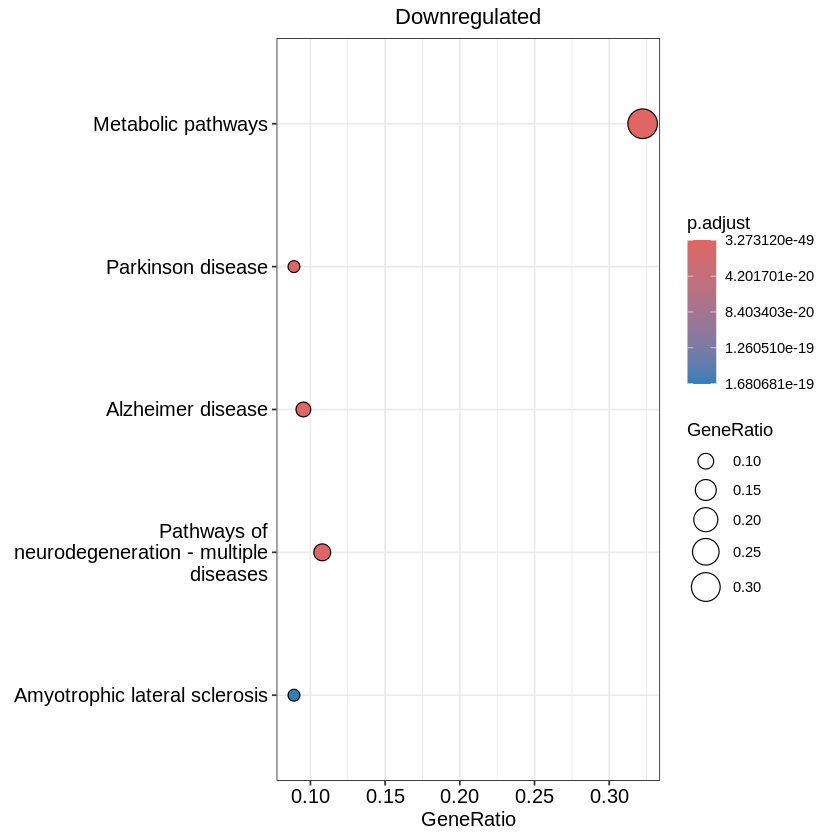

In [122]:
# Modify the g:Profiler result data frame
gp_mod = gp_down_genes$result[, c("query", "source", "term_id", "term_name", "p_value", "query_size",
                                "intersection_size", "term_size", "effective_domain_size", "intersection")]
gp_mod$GeneRatio = paste0(gp_mod$intersection_size, "/", gp_mod$query_size)
gp_mod$BgRatio = paste0(gp_mod$term_size, "/", gp_mod$effective_domain_size)
names(gp_mod) = c("Cluster", "Category", "ID", "Description", "p.adjust", "query_size", "Count",
                  "term_size", "effective_domain_size", "geneID", "GeneRatio", "BgRatio")
gp_mod$geneID = gsub(",", "/", gp_mod$geneID)


row.names(gp_mod) = gp_mod$ID

gp_mod$Cluster <- as.factor(gp_mod$Cluster)

# Define as compareClusterResult object
gp_mod_cluster = new("compareClusterResult", compareClusterResult = gp_mod)

# Define as enrichResult object
gp_mod_enrich = new("enrichResult", result = gp_mod)

# Plot dotplot using enrichplot
enrichplot::dotplot(gp_mod_cluster,x="GeneRatio",title="Downregulated")+theme(plot.title = element_text(hjust = 0.5))

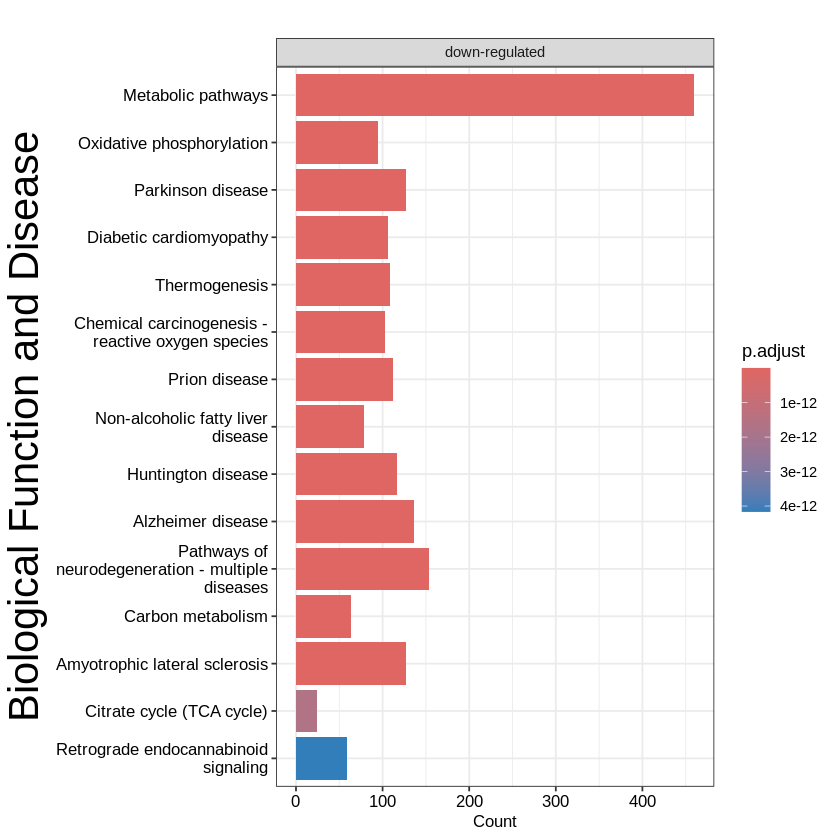

In [123]:
# Plot barplot with facet for each cluster
barplot(gp_mod_enrich, showCategory = 15, font.size = 10) +
  ggplot2::facet_grid(~Cluster) +
  ggplot2::ylab("Biological Function and Disease") +
   ggplot2::theme(axis.title.y = element_text(size = 25))


--------------------------------------------------------------------------------
## WikiPathway (Both Upregulated and downregulated, Upregulated, and Downregulated Genes)

--------------------------------------------------------------------------------


* ##  Both Upregulated and downregulated



In [124]:
#Significant Gene
gp_sig_genes = gost(
  query= list("UPREGULATED AND DOWNREGULATED GENE" = sig_results_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = FALSE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = TRUE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "WP",
  as_short_link = FALSE,
  highlight = FALSE
)

In [125]:
# Remove the 'parents' list column
gp_sig_genes$result$parents <- NULL

# write the data to a CSV file
write.csv(gp_sig_genes$result, file = "gp_sig_genes_results_WP.csv", row.names = TRUE)


The image is saved to gp_sig_genes_WP.jpeg



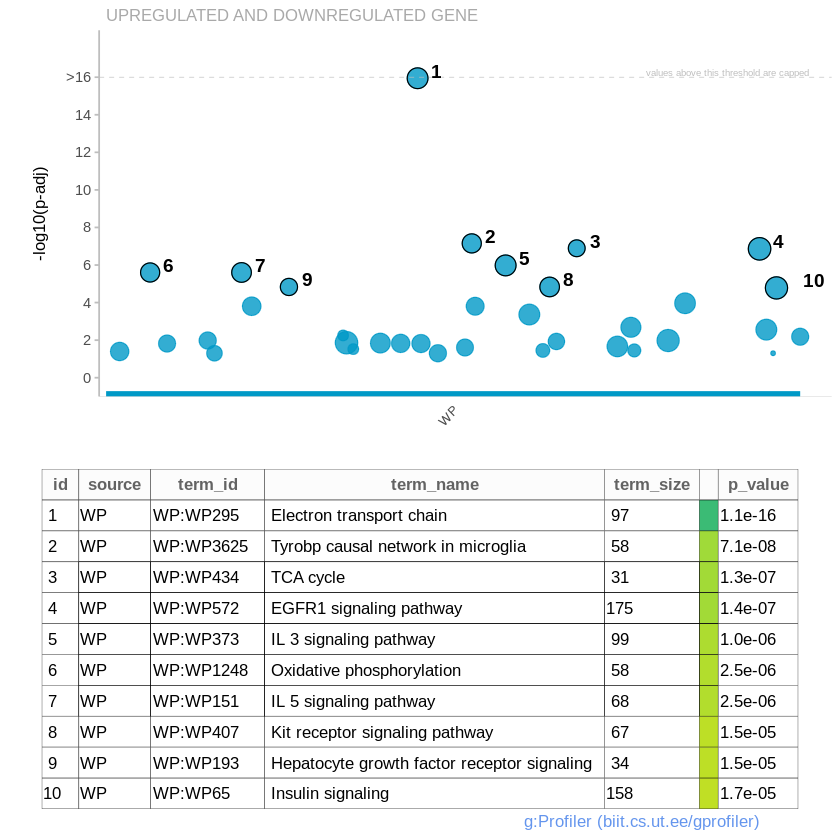

In [126]:
highlightedTerms = gp_sig_genes$result$term_id[1:10]

p = gostplot(gp_sig_genes, interactive = FALSE)

p <- publish_gostplot(p, highlight_terms = highlightedTerms,
                 width = NA, height = NA,
                 filename = "gp_sig_genes_WP.jpeg" )

In [127]:
gp_sig_genes_link = gost(
  query= list("UPREGULATED AND DOWNREGULATED GENE" = sig_results_ordered),
  organism = "mmusculus",
  ordered_query = TRUE,
  multi_query = FALSE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = TRUE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "WP",
  as_short_link = TRUE,
  highlight = FALSE
)

# Print the link
print(gp_sig_genes_link)

#save link
writeLines(gp_sig_genes_link, "gprofiler_WP_AllSig_result_link.txt")

[1] "https://biit.cs.ut.ee/gplink/l/aApWR-JAvQX"


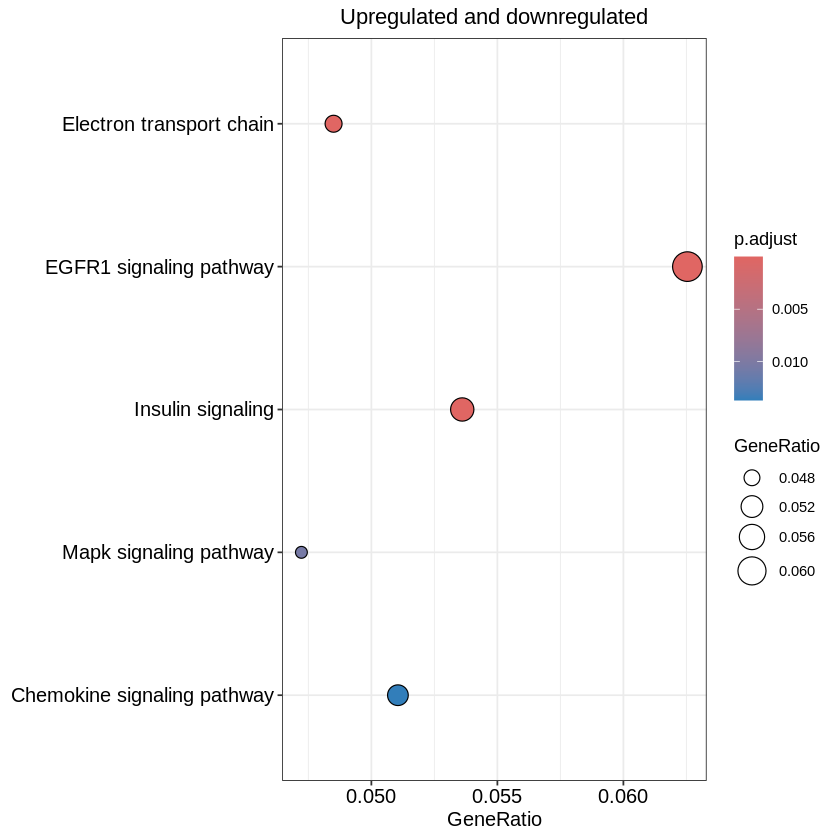

In [128]:
# Modify the g:Profiler result data frame
gp_mod = gp_sig_genes$result[, c("query", "source", "term_id", "term_name", "p_value", "query_size",
                                 "intersection_size", "term_size", "effective_domain_size", "intersection")]
gp_mod$GeneRatio = paste0(gp_mod$intersection_size, "/", gp_mod$query_size)
gp_mod$BgRatio = paste0(gp_mod$term_size, "/", gp_mod$effective_domain_size)
names(gp_mod) = c("Cluster", "Category", "ID", "Description", "p.adjust", "query_size", "Count",
                  "term_size", "effective_domain_size", "geneID", "GeneRatio", "BgRatio")
gp_mod$geneID = gsub(",", "/", gp_mod$geneID)

# Rename duplicated pathway ID for row 77
#gp_mod$ID[77] = "KEGG:04142up"
row.names(gp_mod) = gp_mod$ID

gp_mod$Cluster <- as.factor(gp_mod$Cluster)
# Define as compareClusterResult object
gp_mod_cluster = new("compareClusterResult", compareClusterResult = gp_mod)

# Define as enrichResult object
gp_mod_enrich = new("enrichResult", result = gp_mod)

# Plot dotplot using enrichplot
p=enrichplot::dotplot(gp_mod_cluster,x="GeneRatio",title="Upregulated and downregulated")
p+theme(plot.title = element_text(hjust = 0.5))

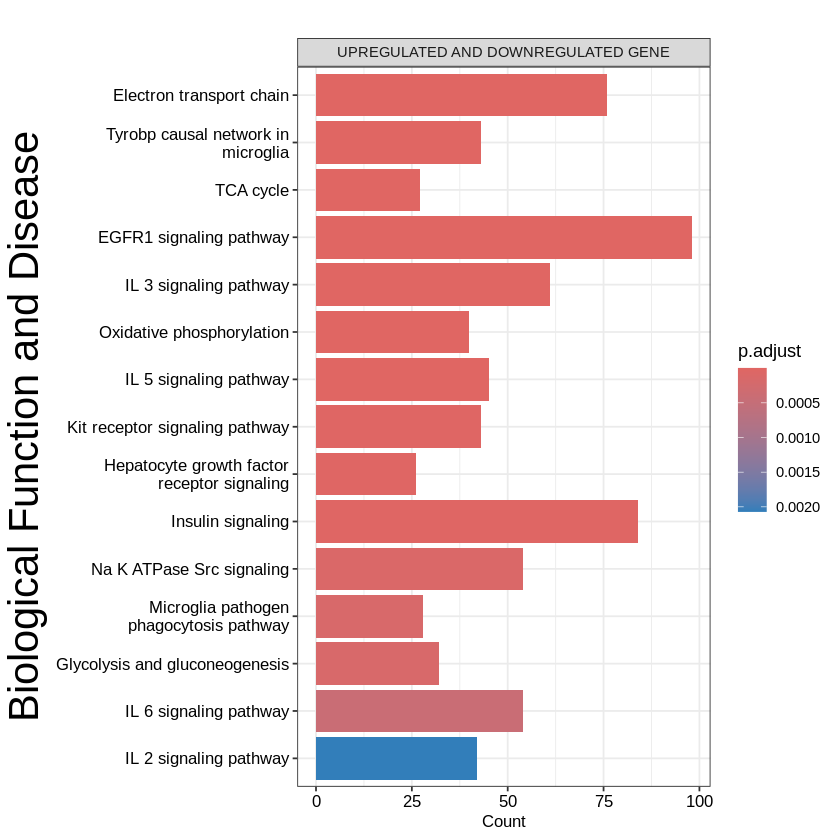

In [129]:
# Plot barplot with facet for each cluster
barplot(gp_mod_enrich, showCategory = 15, font.size = 10) +
  ggplot2::facet_grid(~Cluster) +
  ggplot2::ylab("Biological Function and Disease") +
   ggplot2::theme(axis.title.y = element_text(size = 25))


* ##  Upregulated



In [130]:
#Upregulated Gene
gp_up_genes = gost(
  query= list("up-regulated" = upRegulated_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = FALSE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = TRUE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "WP",
  as_short_link = FALSE,
  highlight = FALSE
)

In [131]:
# Remove the 'parents' list column
gp_up_genes$result$parents <- NULL

# write the data to a CSV file
write.csv(gp_up_genes$result, file = "gp_sig_genes_results_WP_up.csv", row.names = TRUE)

In [132]:
# Trim whitespace from the query column
gp_up_genes$result$query <- trimws(gp_up_genes$result$query)

# Check unique values to verify correctness
unique(gp_up_genes$result$query)

# Now extract top 10 term_ids for each group
top_up <- head(subset(gp_up_genes$result, query == "up-regulated")$term_id, 10)
#top_down <- head(subset(gp_up_and_down_genes$result, query == "down-regulated")$term_id, 5)
top_down=NULL
# Combine them
combined_ids <- c(top_up, top_down)

# Print result
print(combined_ids)

[1] "up-regulated"

 [1] "WP:WP3625" "WP:WP151"  "WP:WP3626" "WP:WP373"  "WP:WP450"  "WP:WP407" 
 [7] "WP:WP387"  "WP:WP1253" "WP:WP2292" "WP:WP572" 


The image is saved to gp_sig_genes_WP_up.jpeg



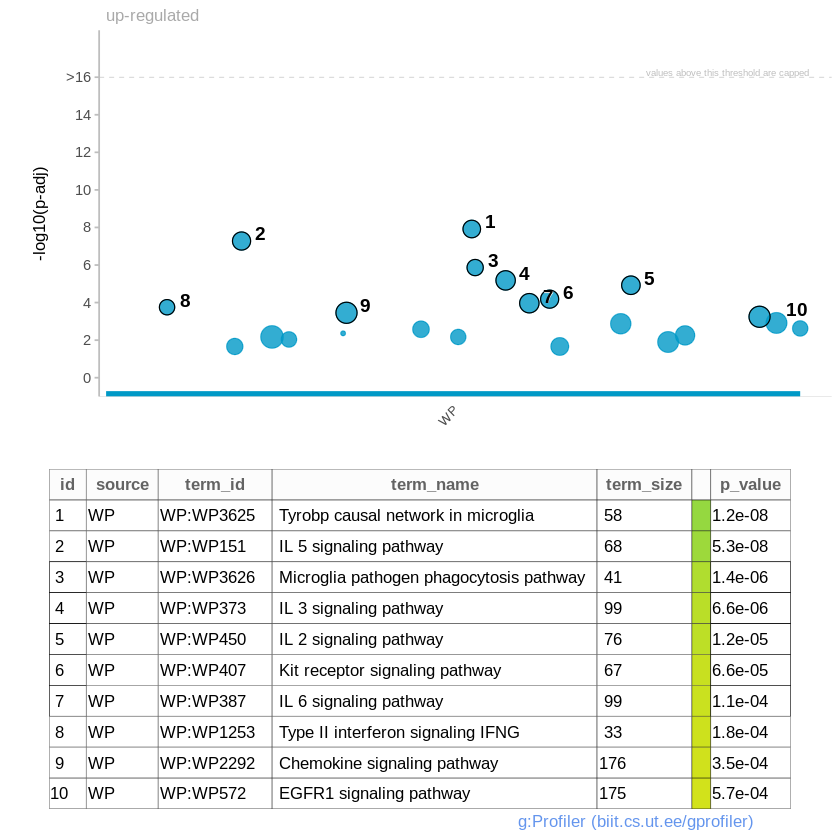

In [133]:
p = gostplot(gp_up_genes, interactive = FALSE)


p <- publish_gostplot(p, highlight_terms = combined_ids,
                 width = NA, height = NA,
                 filename = "gp_sig_genes_WP_up.jpeg" )

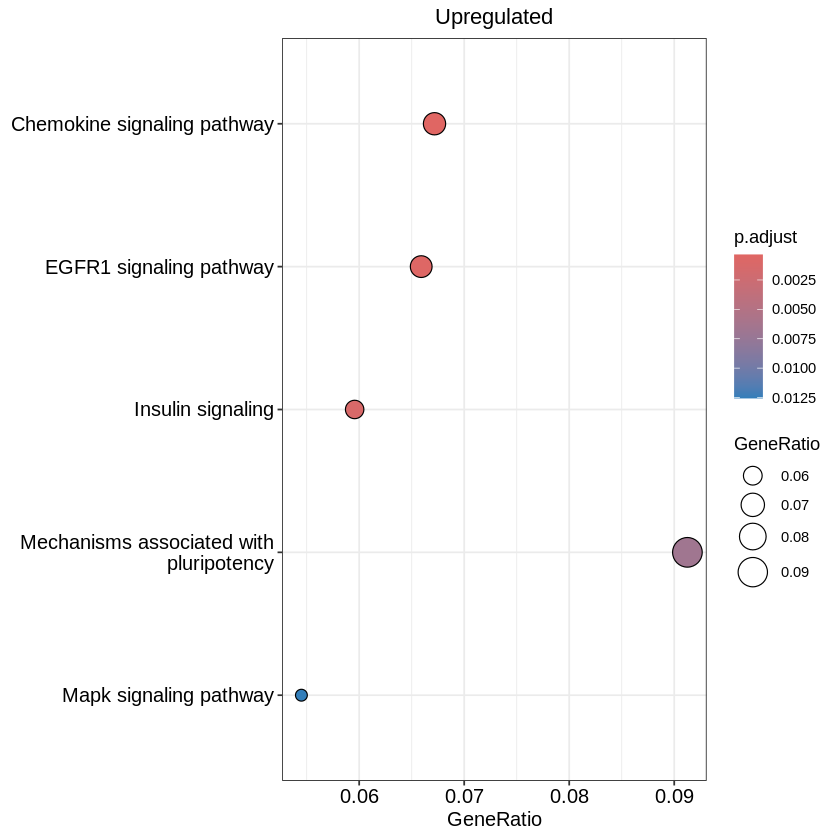

In [134]:
# Modify the g:Profiler result data frame
gp_mod = gp_up_genes$result[, c("query", "source", "term_id", "term_name", "p_value", "query_size",
                                         "intersection_size", "term_size", "effective_domain_size", "intersection")]
gp_mod$GeneRatio = paste0(gp_mod$intersection_size, "/", gp_mod$query_size)
gp_mod$BgRatio = paste0(gp_mod$term_size, "/", gp_mod$effective_domain_size)
names(gp_mod) = c("Cluster", "Category", "ID", "Description", "p.adjust", "query_size", "Count",
                  "term_size", "effective_domain_size", "geneID", "GeneRatio", "BgRatio")
gp_mod$geneID = gsub(",", "/", gp_mod$geneID)

# Rename duplicated pathway ID for row 77
#gp_mod$ID[77] = "KEGG:04142up"
row.names(gp_mod) = gp_mod$ID

gp_mod$Cluster <- as.factor(gp_mod$Cluster)

# Define as compareClusterResult object
gp_mod_cluster = new("compareClusterResult", compareClusterResult = gp_mod)

# Define as enrichResult object
gp_mod_enrich = new("enrichResult", result = gp_mod)

# Plot dotplot using enrichplot
enrichplot::dotplot(gp_mod_cluster,x="GeneRatio",title="Upregulated")+theme(plot.title = element_text(hjust = 0.5))



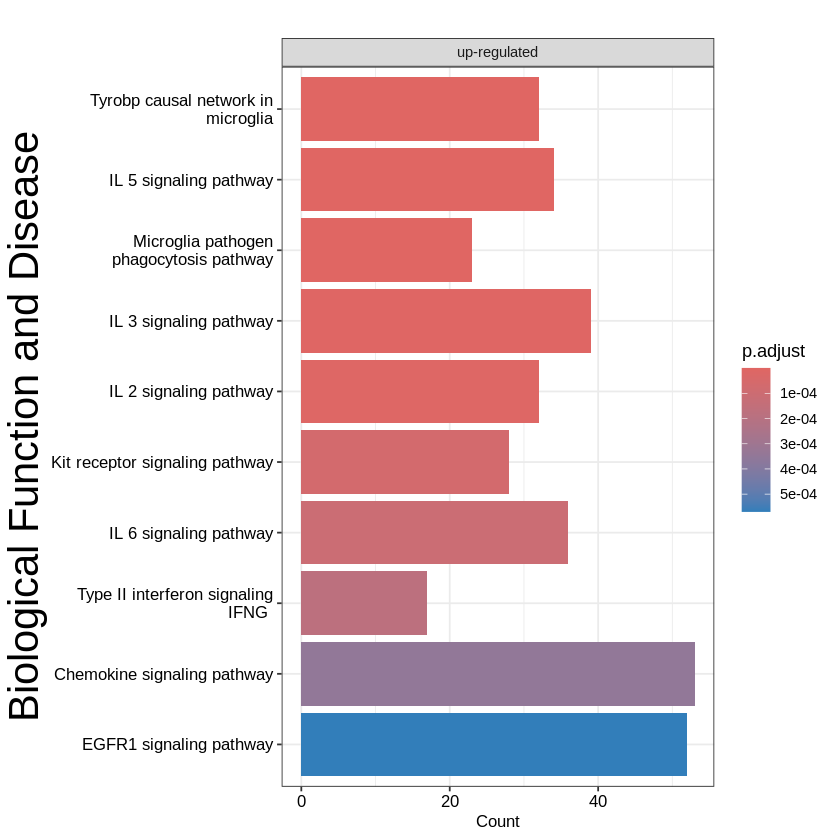

In [136]:
barplot(gp_mod_enrich, showCategory = 10, font.size = 10) +
  ggplot2::facet_grid(~Cluster) +
  ggplot2::ylab("Biological Function and Disease") +
  ggplot2::theme(axis.title.y = element_text(size = 25))



* ##  Downregulated



In [137]:
#Downregulated Gene
gp_down_genes = gost(
  query= list("down-regulated" = downRegulated_ordered),
  organism = "mmusculus",
  ordered_query = FALSE,
  multi_query = FALSE,
  significant = TRUE,
  exclude_iea = TRUE,
  measure_underrepresentation = FALSE,
  evcodes = TRUE,
  user_threshold = 0.05,
  correction_method = "fdr",
  domain_scope = "annotated",
  custom_bg = NULL,
  numeric_ns = "",
  sources = "WP",
  as_short_link = FALSE,
  highlight = FALSE
)

In [138]:
# Remove the 'parents' list column
gp_down_genes$result$parents <- NULL

# write the data to a CSV file
write.csv(gp_down_genes$result, file = "gp_sig_genes_results_WP_down.csv", row.names = TRUE)

In [139]:
# Trim whitespace from the query column
gp_down_genes$result$query <- trimws(gp_down_genes$result$query)

# Check unique values to verify correctness
unique(gp_down_genes$result$query)

# Now extract top 15 term_ids for each group
#top_up <- head(subset(gp_up_genes$result, query == "up-regulated")$term_id, 5)
top_down <- head(subset(gp_down_genes$result, query == "down-regulated")$term_id, 15)
top_up=NULL
# Combine them
combined_ids <- c(top_up, top_down)

# Print result
print(combined_ids)

[1] "down-regulated"

 [1] "WP:WP295"  "WP:WP1248" "WP:WP434"  "WP:WP157"  "WP:WP662"  "WP:WP1269"
 [7] "WP:WP3588" "WP:WP2318" "WP:WP401"  "WP:WP336"  "WP:WP454"  "WP:WP6"   
[13] "WP:WP572"  "WP:WP103"  "WP:WP543" 


The image is saved to gp_sig_genes_WP_down.jpeg



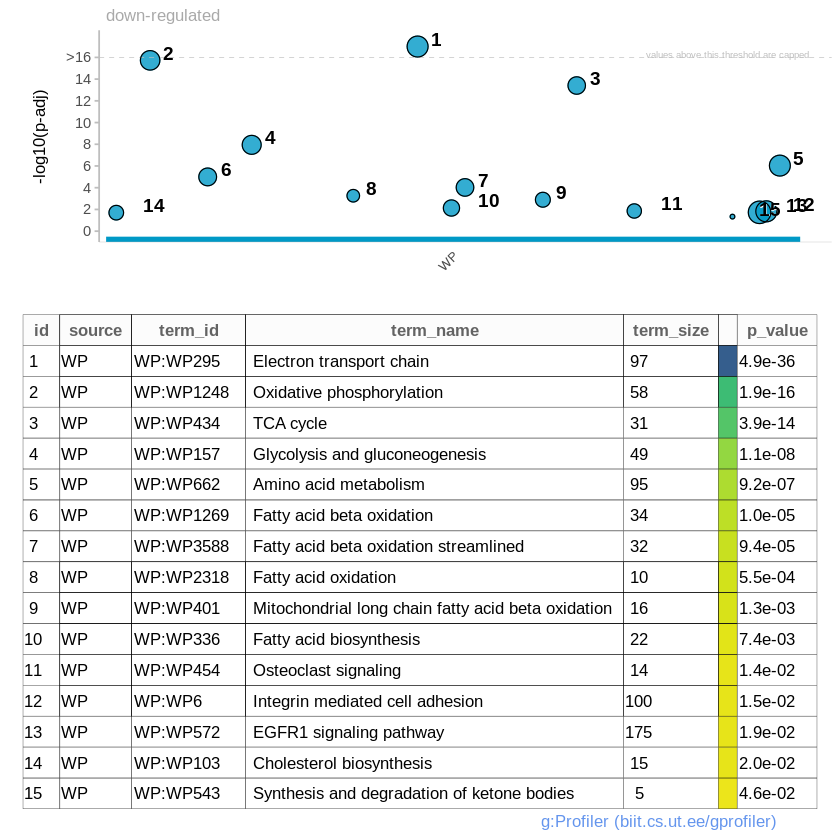

In [140]:
p = gostplot(gp_down_genes, interactive = FALSE)


p <- publish_gostplot(p, highlight_terms = combined_ids,
                 width = NA, height = NA,
                 filename = "gp_sig_genes_WP_down.jpeg" )